Analysing a Game Dataset

- Import the libraries to use

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

- Read the data from csv and print first 10 data 

In [2]:
dataGame = pd.read_csv('game.csv')
dataGame.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


- Find the column and row count 

In [3]:
dataGame.shape

(16598, 11)

=> So, there are 16598 rows and 11 columns

- List of all columns with their data types and the number of non-null values in each column

In [4]:
dataGame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


=> Their fields and data types are:

- Rank - Ranking of overall sales, integer

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.), object

- Year - Year of the game's release, float

- Genre - Genre of the game ,object

- Publisher - Publisher of the game, object

- NA_Sales - Sales in North America (in millions), float

- EU_Sales - Sales in Europe (in millions), float

- JP_Sales - Sales in Japan (in millions), float

- Other_Sales - Sales in the rest of the world (in millions), float

- Global_Sales - Total worldwide sales, float

LET'S WORK on SOME GRAPHS

- Game genres and count of games in these genres graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

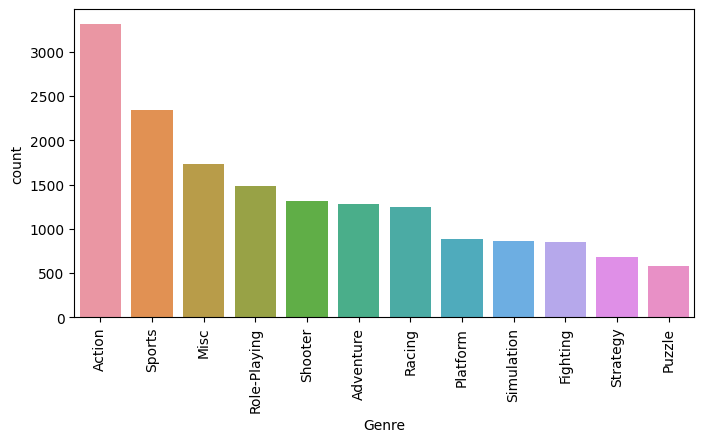

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(x = "Genre", data = dataGame, order = dataGame['Genre'].value_counts().index)
plt.xticks(rotation=90)

- Sorting the number of games produced by years by showing the game genres

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0')])

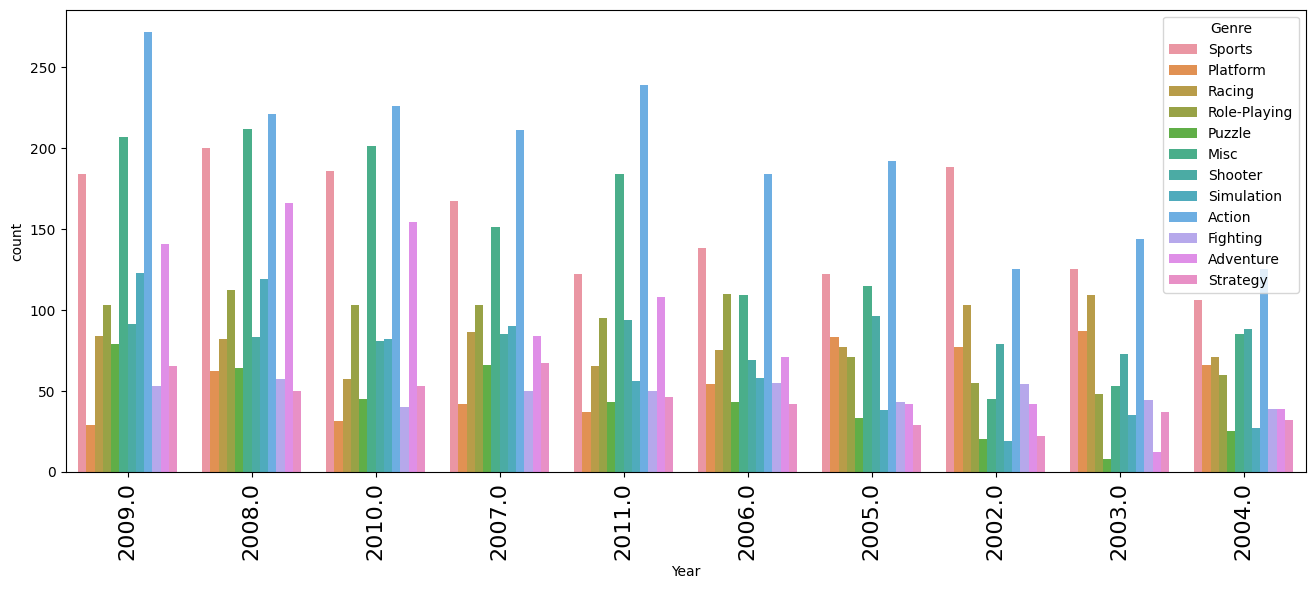

In [6]:
plt.figure(figsize=(16, 6))
sns.countplot(x="Year", data=dataGame, hue='Genre', order=dataGame.Year.value_counts().iloc[:10].index)
plt.xticks(size=16, rotation=90)

- Sales comparison by genre

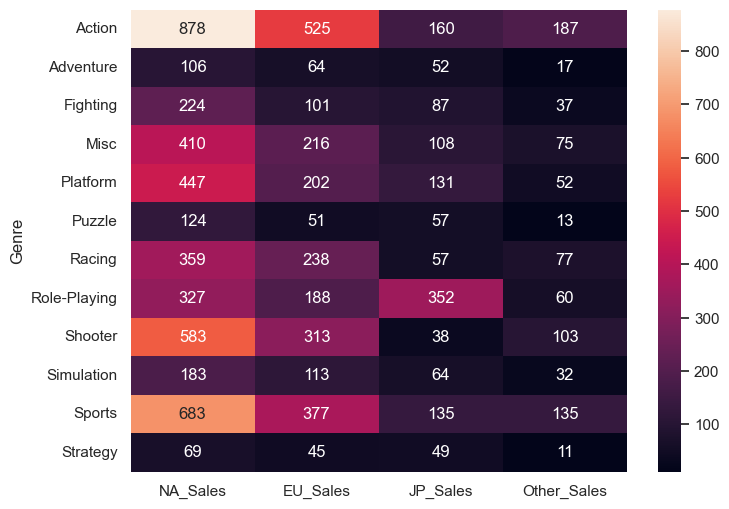

In [7]:
comparison_genre = dataGame[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comparison_map = comparison_genre.groupby(by=['Genre']).sum()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.heatmap(comparison_map, annot=True, fmt = '.0f') #annot shows count, fmt numbers after comma
plt.show()

- Platforms and their global sales

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'PS4'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'XB'),
  Text(11, 0, 'GB'),
  Text(12, 0, 'NES'),
  Text(13, 0, '3DS'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

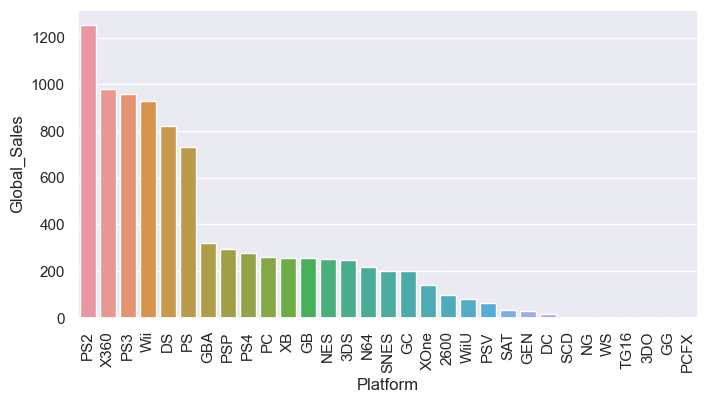

In [8]:
platform = dataGame.groupby(by=['Platform'])['Global_Sales'].sum()
platform = platform.reset_index()
platform = platform.sort_values(by=['Global_Sales'], ascending = False)
#draw
plt.figure(figsize=(8, 4))
sns.barplot(x= "Platform", y= "Global_Sales", data = platform)
plt.xticks(rotation=90)

- Top Sales comparison by platform (top 5)

In [9]:
comparison_platform = dataGame[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comparison_platform.head(5)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


- Top 10 Game Publisher

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive')])

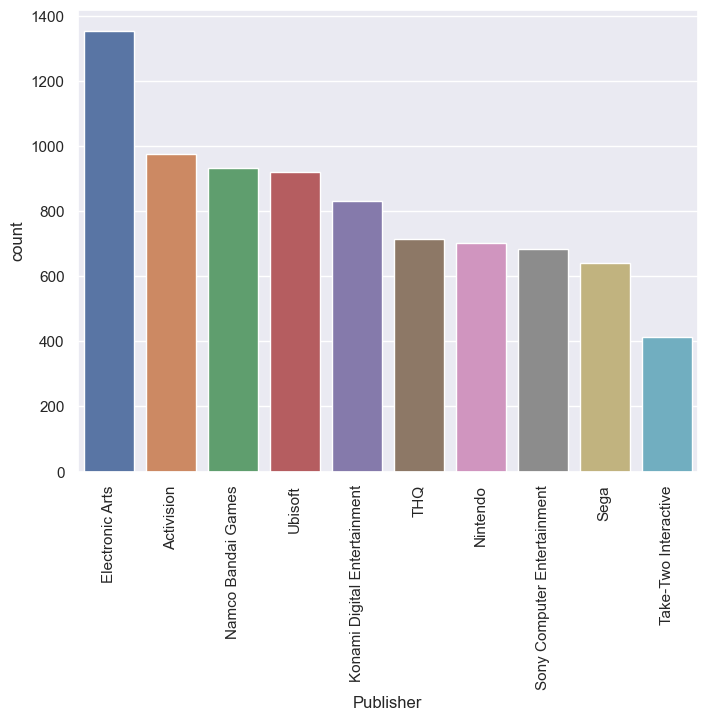

In [10]:
top_publisher = dataGame.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(10)
top_publisher = pd.DataFrame(top_publisher).reset_index()

plt.figure(figsize=(8, 6))
sns.countplot(x = "Publisher", data = dataGame, order = dataGame.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:10].index)
plt.xticks(rotation=90)

- Global Game Sales 

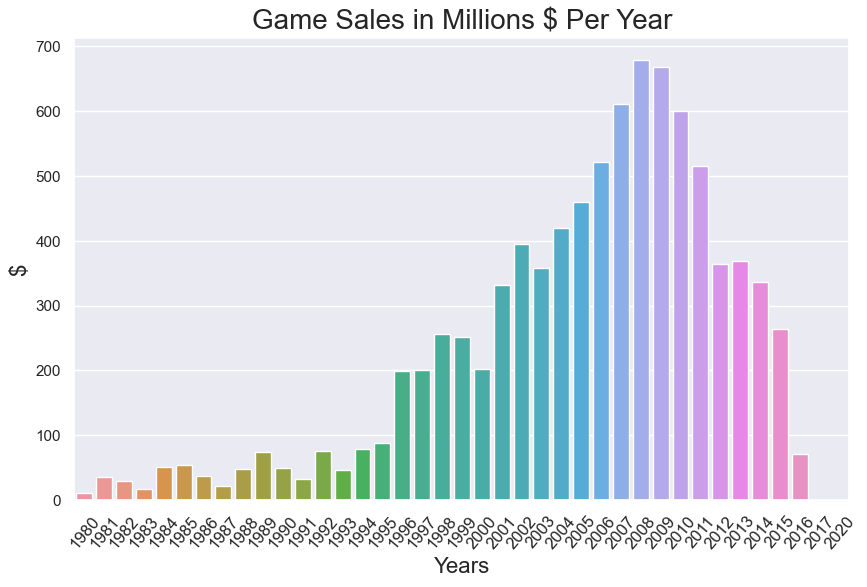

In [11]:
y = dataGame.groupby(['Year'])['Global_Sales'].sum()
x = y.index.astype(int)
plt.figure(figsize=(10,6))
ax=sns.barplot(y = y, x = x)
plt.xlabel(xlabel='Years', fontsize=16)
plt.xticks(fontsize=12, rotation=50)
plt.ylabel(ylabel='$', fontsize=16)
plt.title(label='Game Sales in Millions $ Per Year', fontsize=20)
plt.show()

SUMMARIZE

Global Sales Between 1980.0 2020.0


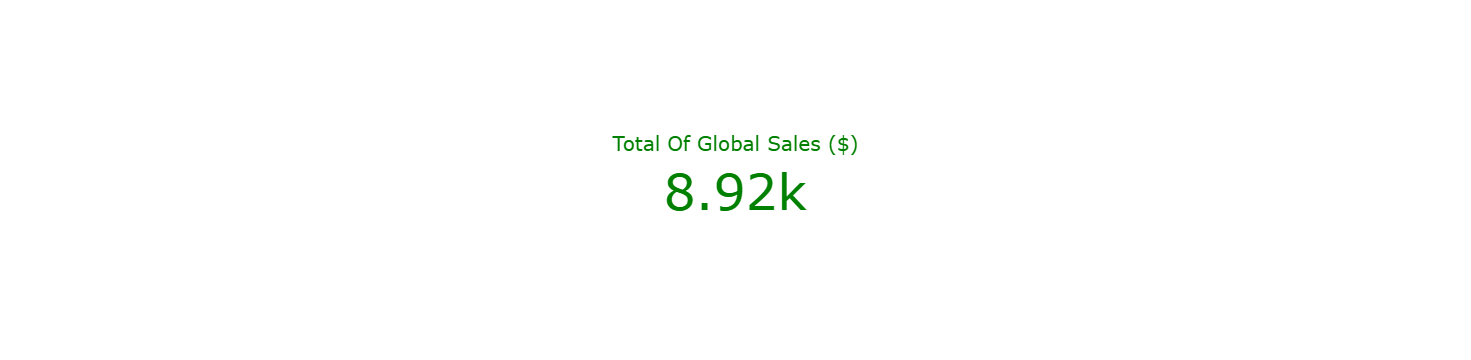

In [14]:
total = dataGame['Global_Sales'].sum()
i = dataGame['Year'].min()
a = dataGame['Year'].max()
ttle = ("Total Of Global Sales ($)")

fig = go.Figure()
print("Global Sales Between", i , a)
fig.add_trace(go.Indicator(
    mode = "number",
    value = total,
    title = {'text': ttle,'font': {'color': 'green','size':20}},
    number={'font':{'color': 'green','size':50}}
))
fig.show()

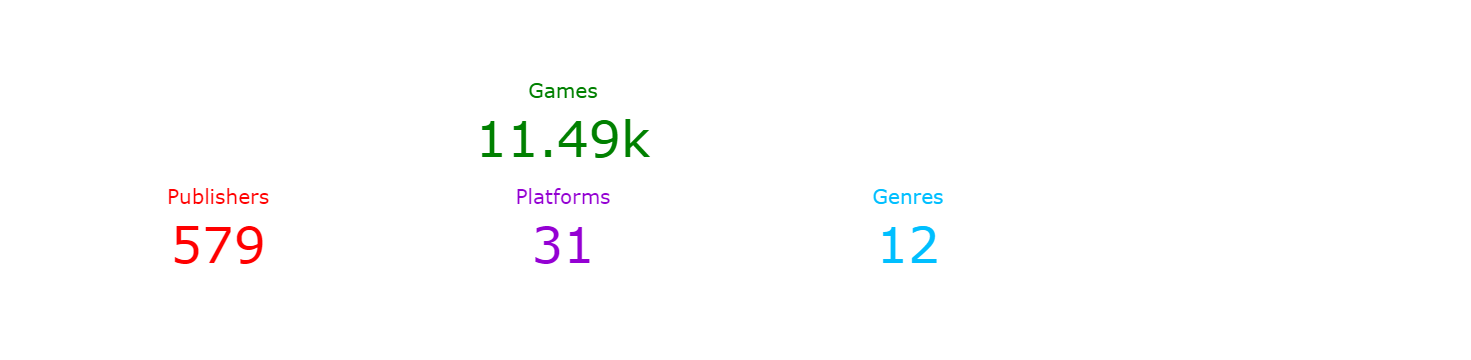

In [15]:
games = dataGame['Name'].unique()
publisher = dataGame['Publisher'].unique()
platforms = dataGame['Platform'].unique()
genres = dataGame['Genre'].unique()

fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(publisher),
    title = {'text': "Publishers",'font': {'color': 'red','size':20}},
    number={'font':{'color': 'red','size':50}},
    domain = {'row': 1, 'column': 0}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(platforms),
    title = {'text': "Platforms",'font': {'color': 'darkviolet','size':20}},
    number={'font':{'color': 'darkviolet','size':50}},
    domain = {'row': 1, 'column': 1}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(genres),
    title = {'text': "Genres",'font': {'color': 'deepskyblue','size':20}},
    number={'font':{'color': 'deepskyblue','size':50}},
    domain = {'row': 1, 'column': 2}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(games),
    title = {'text': "Games",'font': {'color': 'green','size':20}},
    number={'font':{'color': 'green','size':50}},
    domain = {'row': 0, 'column': 1}
))

fig.update_layout(
    grid = {'rows': 2, 'columns': 4, 'pattern': "independent"})
fig.show()